In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file_path = '../data/baseball_mlb_2024-08-01_2024-08-11'
all_files = os.listdir(file_path)
print(all_files)

['7_8_aug_part.0.parquet', '11_aug_part.0.parquet', '9_aug_part.0.parquet', 'part.3.parquet', 'part.0.parquet', 'part.1.parquet', '11_aug_part.1.parquet', '6_aug_part.0.parquet', '10_aug_part.1.parquet', '10_aug_part.0.parquet', 'part.2.parquet', '7_8_aug_part.1.parquet']


In [3]:
df = None
for file in all_files:
    if df is None:
        df = pd.read_parquet(os.path.join(file_path, file))
    else:
        df = pd.concat([df, pd.read_parquet(os.path.join(file_path, file))], axis=0)

df.drop_duplicates(inplace=True)

In [4]:
df.columns

Index(['id', 'sport', 'league', 'game_id', 'home_team', 'away_team',
       'start_date', 'is_main', 'sportsbook', 'normalized_sportsbook',
       'market', 'normalized_market', 'name', 'normalized_name', 'selection',
       'normalized_selection', 'selection_line', 'selection_points',
       'player_id', 'clv_price', 'clv_points', 'closed_at', 'fixture_id',
       'opened_at', 'processed', 'olv_points', 'olv_price', 'normalized_sport',
       'normalized_league'],
      dtype='object')

In [5]:
df['selection_points'] = df['selection_points'].fillna(0)
df['olv_price'] = df['olv_price'].fillna(0)

In [6]:
#different sportsbook
print(df['normalized_sportsbook'].unique())
good_sportsbooks = ['pinnacle', 'fanduel', 'draftkings', 'bookmaker', 'circa_vegas', 'betmgm', 'betonline', 'betrivers', 'caesars', 'william_hill', 'espnbet', 'fanatics', 'bovada', 'fliff', 'hard_rock', 'bet365']

<StringArray>
[     'caesars_michigan_',        'caesars_nevada_',  'caesars_pennsylvania_',
               'thrillzz',               'superbet',               'thescore',
    'underdog_sportsbook',      'caesars_new_york_',                  'fliff',
                  'bet99',
 ...
                 'sx_bet',   'sporttrade_colorado_',             'sporttrade',
                 'betdex',                'betsson',               'betwhale',
 'unibet_united_kingdom_',                  'coral',              'betopenly',
              'powerplay']
Length: 113, dtype: string


In [7]:
# checking for names of good sportsbook
for sportsbook in good_sportsbooks:
    present = sportsbook in df['normalized_sportsbook'].unique()
    print(sportsbook+' '+str(present))

pinnacle True
fanduel True
draftkings True
bookmaker True
circa_vegas True
betmgm True
betonline True
betrivers True
caesars False
william_hill True
espnbet False
fanatics True
bovada True
fliff True
hard_rock True
bet365 True


In [14]:
df = df[df['normalized_sportsbook'].isin(['pinnacle', 'fanduel', 'draftkings', 'bookmaker', 'circa_vegas', 'betmgm', 
                                          'betonline', 'betrivers', 'caesars', 'william_hill', 'espnbet', 'fanatics', 
                                          'bovada', 'fliff', 'hard_rock', 'bet365'])]
print(len(df))
df_runline = df[df['normalized_market']=='run_line']
print(len(df_runline))

1034941
28207


In [15]:
grouped = df_runline.groupby(['game_id', 'normalized_selection', 'start_date'])
list_of_selection_points = grouped['selection_points'].apply(list)
min_val_selection_points = grouped['selection_points'].min().min()
max_val_selection_points = grouped['selection_points'].max().max()
print(list_of_selection_points.head(1))
print(len(list_of_selection_points))

game_id                    normalized_selection  start_date               
12164-25135-2024-08-05-14  new_york_mets         2024-08-05T14:15:00-07:00    [-1.5, 3.5, -1.5, -3.5, -2.5, -4.5, 1.5, 4.5, ...
Name: selection_points, dtype: object
1149


In [16]:
list_of_olv_prices = grouped['olv_price'].apply(list)
print(list_of_olv_prices.head(1))
print(len(list_of_olv_prices))

game_id                    normalized_selection  start_date               
12164-25135-2024-08-05-14  new_york_mets         2024-08-05T14:15:00-07:00    [140.0, -550.0, 135.0, 275.0, 185.0, 400.0, -2...
Name: olv_price, dtype: object
1149


In [17]:
selection_points_vs_olv_prices = pd.merge(list_of_selection_points, list_of_olv_prices, on=['game_id', 'normalized_selection', 'start_date']).sort_values('game_id').reset_index()
print(selection_points_vs_olv_prices.head())

                     game_id normalized_selection                 start_date  \
0  12164-25135-2024-08-05-14        new_york_mets  2024-08-05T14:15:00-07:00   
1  12164-25135-2024-08-05-14        new_york_mets  2024-08-05T21:15:00+00:00   
2  12164-25135-2024-08-05-14        new_york_mets  2024-08-05T21:16:00+00:00   
3  12164-25135-2024-08-05-14        new_york_mets  2024-08-05T21:20:00+00:00   
4  12164-25135-2024-08-05-14        new_york_mets  2024-08-06T03:55:00+00:00   

                                    selection_points  \
0  [-1.5, 3.5, -1.5, -3.5, -2.5, -4.5, 1.5, 4.5, ...   
1  [-5.5, -1.5, 3.5, 2.5, -3.5, -4.5, -1.5, 1.5, ...   
2                  [-2.5, 1.5, 2.5, -1.5, -3.5, 3.5]   
3                                   [-3.5, 3.0, 3.5]   
4                                 [-5.0, -5.5, -6.0]   

                                           olv_price  
0  [140.0, -550.0, 135.0, 275.0, 185.0, 400.0, -2...  
1  [625.0, 135.0, -650.0, -390.0, 300.0, 425.0, 1...  
2      [210.0, -2

In [18]:
print(len(selection_points_vs_olv_prices))

1149


ValueError: num must be an integer with 1 <= num <= 190, not 191

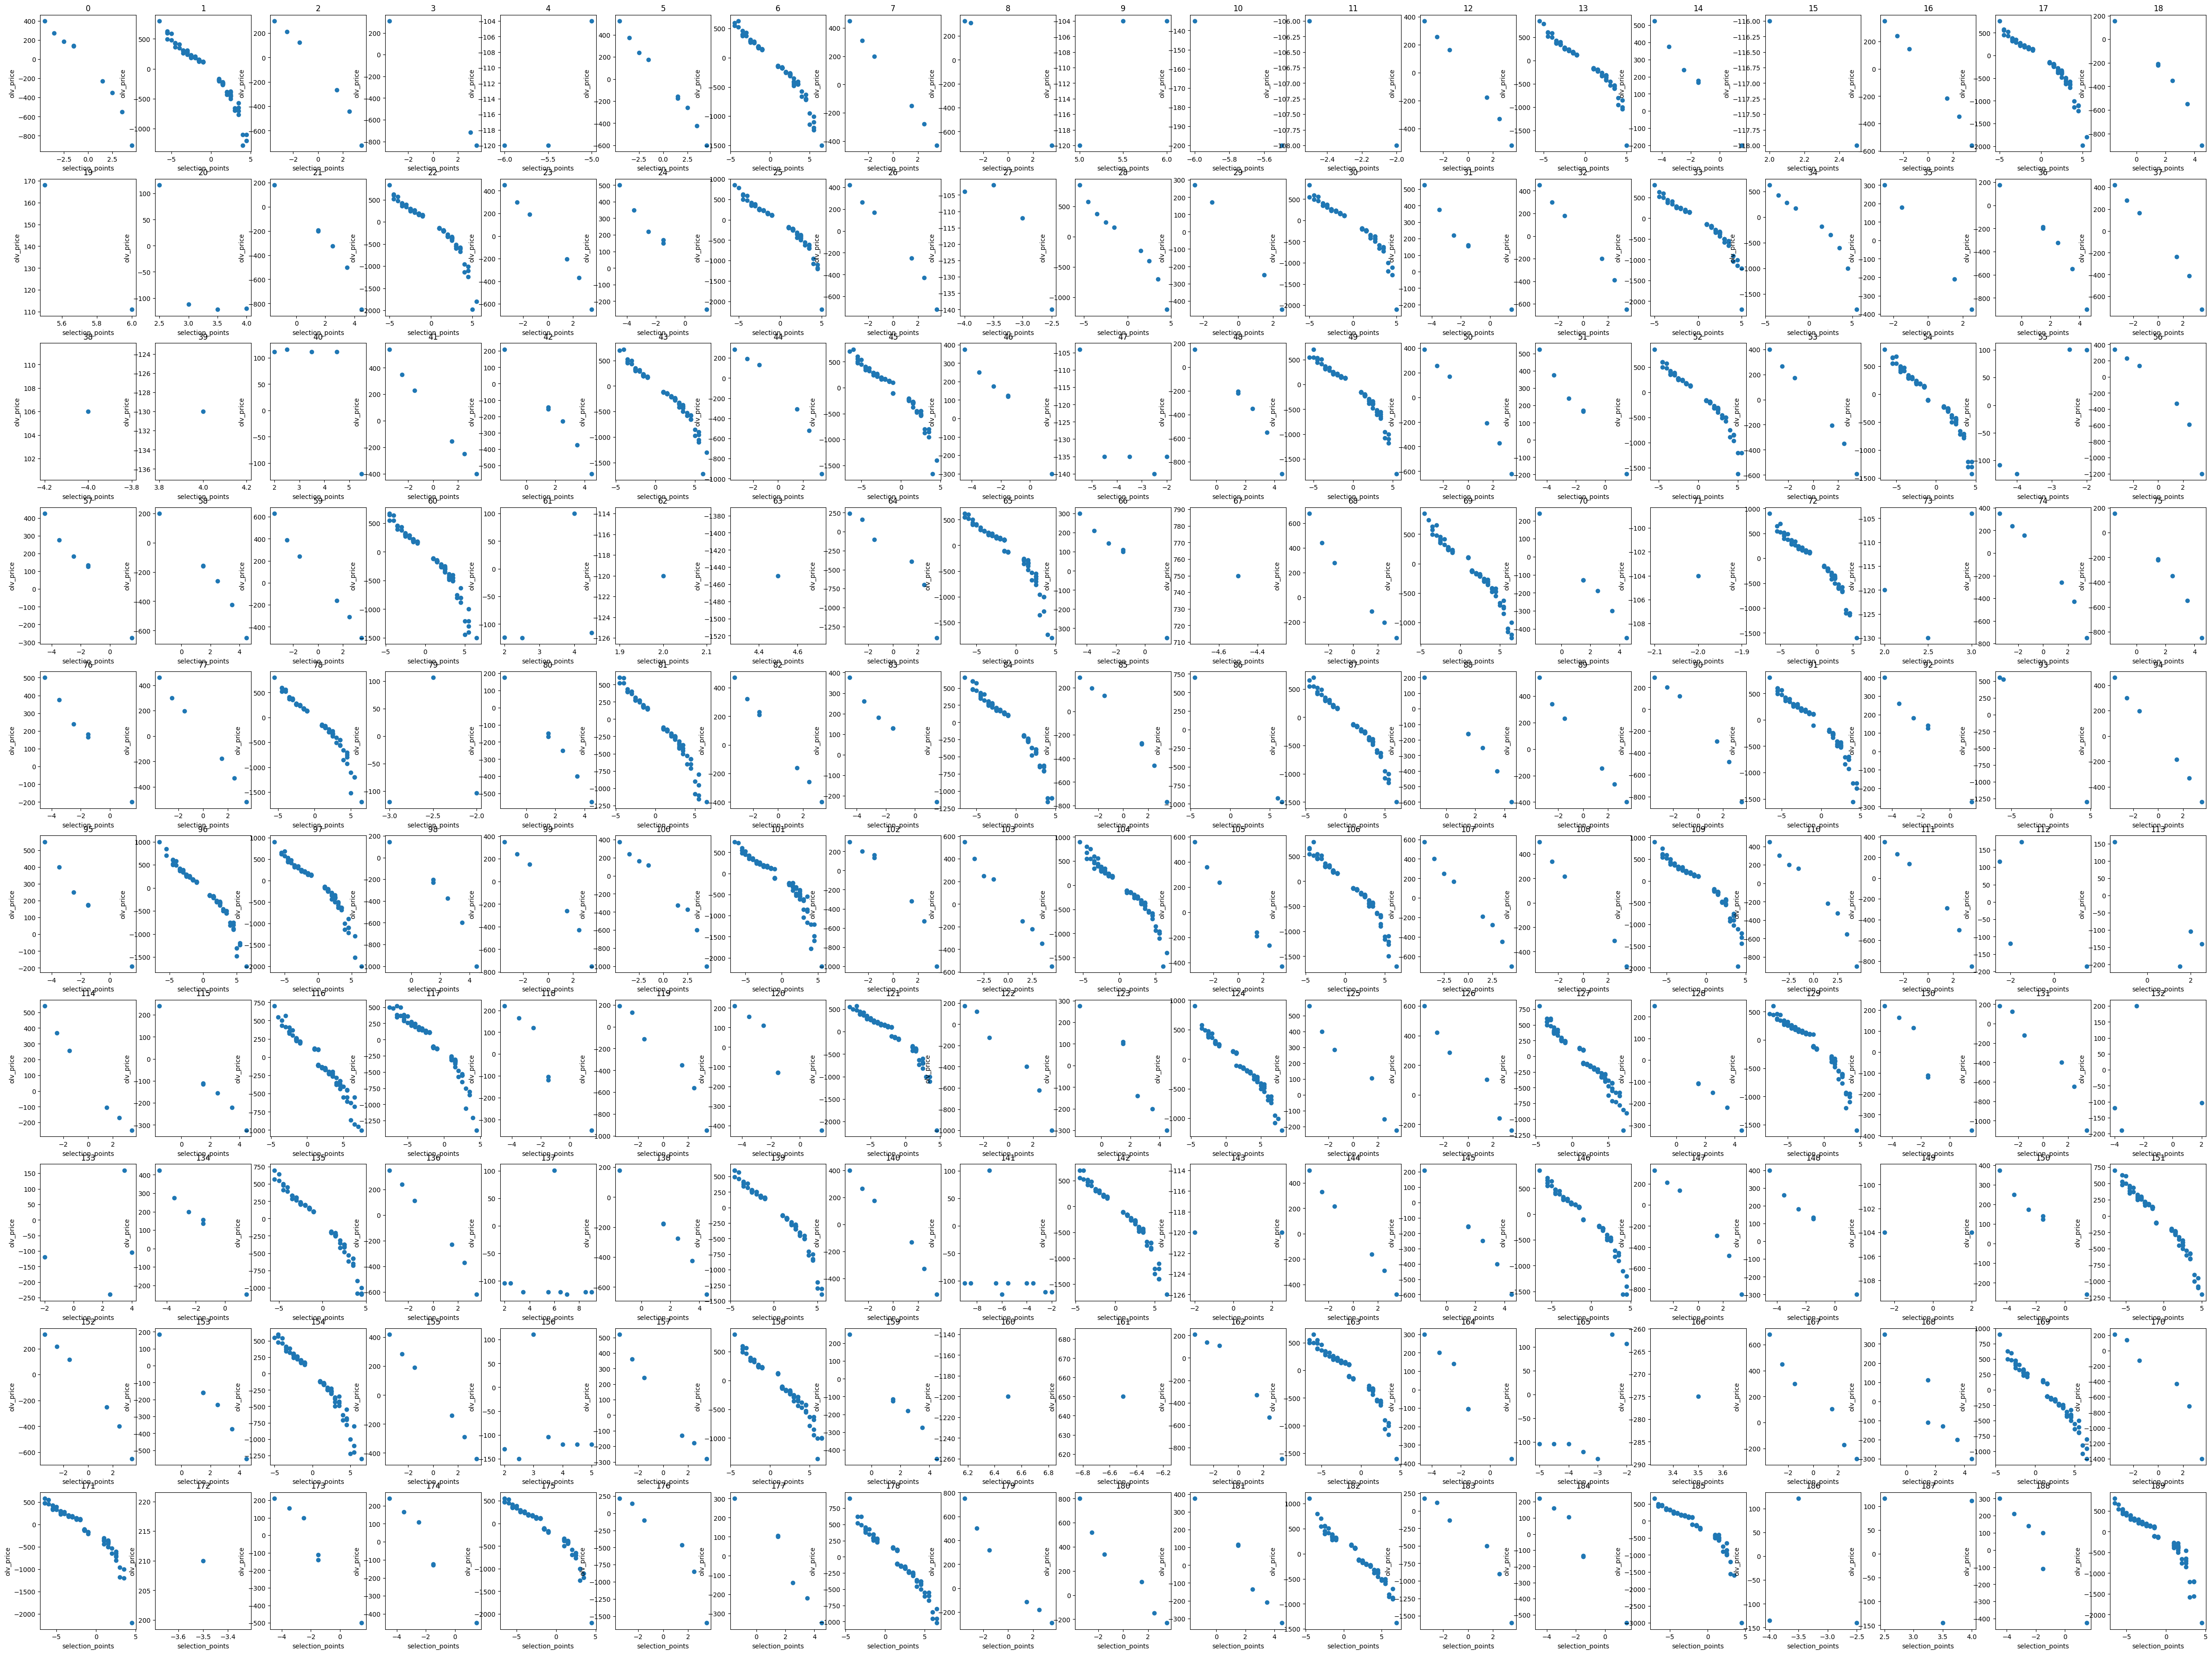

In [20]:
count = 0
plt.figure(figsize = [60, 45])
for index, row in selection_points_vs_olv_prices.iterrows():
    plt.subplot(10, 19, count+1)
    plt.scatter(row['selection_points'], row['olv_price'])
    plt.xlabel('selection_points')
    plt.ylabel('olv_price')
    plt.title(index)
    assert(len(row['selection_points']) == len(row['olv_price']))
    count+=1
plt.tight_layout()